In [2]:
from typing import Sequence

import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

## Préparation générale des données

- (Déposer manuellement une des images récupérées par webscraping ou API dans le même dossier que le notebook ou travailler avec une image déjà présente.)
- Trouver la fonction d'OpenCV (cv2) permettant de charger une image, et l'utiliser pour charger l'image choisie. <br>
- A l'aide de la fonction cvtColor de cv2, convertir l'image vers l'espace COLOR_BGR2RGB.

In [3]:
img = cv2.cvtColor(cv2.imread("rose.jpg"), cv2.COLOR_BGR2RGB)

- Afficher l'image à l'aide de plt.

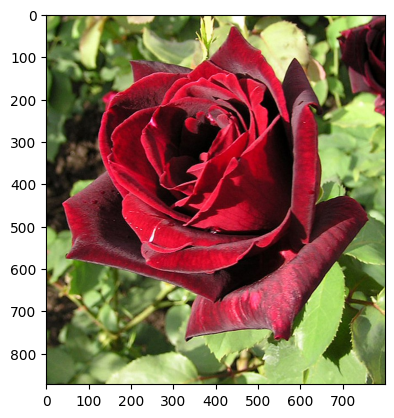

In [4]:
plt.imshow(img)
plt.show()

- Afficher la taille de l'image.

In [5]:
img.shape

(873, 800, 3)

- Séparer ("split") les 3 canaux de couleurs de l'image (bleu, vert, rouge).

In [6]:
red, green, blue = cv2.split(img)

- A l'aide de subplots (plt), afficher les images de chaque canal de couleur. Ajouter à chacune d'elle un titre indiquant la couleur correspondante.

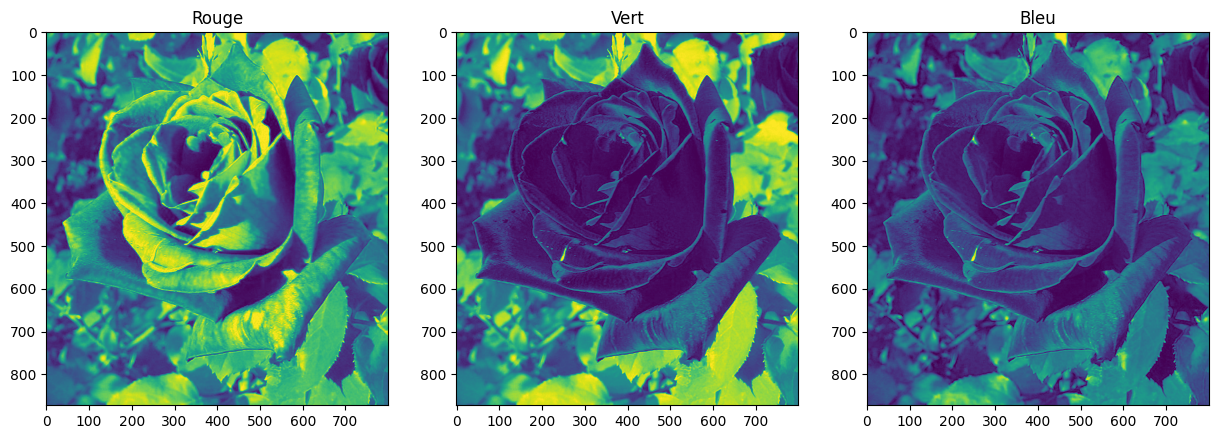

In [7]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(131)
plt.title("Rouge")
plt.imshow(red)
fig.add_subplot(132)
plt.title("Vert")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Bleu")
plt.imshow(blue)
plt.show()

## Préparation spécifique des données

- Afficher les valeurs numériques contenues dans un canal de couleurs. Trouver le minimum et le maximum de ces valeurs.

In [8]:
print(red.max())
print(red.min())

255
0


- Normaliser les données.

In [9]:
red_norm = red / 255
green_norm = green / 255
blue_norm = blue / 255

## Première ACP

- Préparer une constante comportant le nombre de composantes de l'ACP (200 pour le moment).

In [10]:
n_components = 70

- Réaliser 3 ACP distinctes pour chaque canal de couleurs, en fittant sur les données normalisées et en transformant ces mêmes données.

In [11]:
pca_r = PCA(n_components=n_components)
tr_r = pca_r.fit_transform(red_norm)

pca_g = PCA(n_components=n_components)
tr_g = pca_g.fit_transform(green_norm)

pca_b = PCA(n_components=n_components)
tr_b = pca_b.fit_transform(blue_norm)

- Vérifier la taille des matrices ainsi obtenues et les comparer avec les tailles initiales.

In [12]:
print(tr_b.shape)

(873, 70)


- Représenter les ratios de variance expliquée (inertie) en pourcentage. Représenter également le pourcentage cumulé.

In [13]:
pca_r.explained_variance_ratio_

array([0.1906862 , 0.10790111, 0.08327694, 0.07409898, 0.063164  ,
       0.04531844, 0.04056248, 0.03624574, 0.03115416, 0.03047939,
       0.02860601, 0.0247994 , 0.02059668, 0.01642643, 0.01378317,
       0.01282442, 0.01109974, 0.00970942, 0.00924666, 0.00834073,
       0.00744817, 0.00668829, 0.0063358 , 0.00581443, 0.00571982,
       0.00511887, 0.00509835, 0.00478034, 0.00438015, 0.00399262,
       0.00387061, 0.0036223 , 0.00353717, 0.00316707, 0.00294387,
       0.0028858 , 0.00268617, 0.00248124, 0.00243851, 0.00210177,
       0.00205728, 0.00192387, 0.00183482, 0.00174205, 0.00166629,
       0.00162041, 0.00149555, 0.00138678, 0.00134095, 0.00131092,
       0.00122588, 0.00120867, 0.00111281, 0.00106841, 0.00102847,
       0.0010103 , 0.00097329, 0.00092528, 0.0008955 , 0.00084744,
       0.00082976, 0.00075481, 0.00073664, 0.00072368, 0.0006773 ,
       0.00065908, 0.00064661, 0.00062976, 0.00060639, 0.00059677])

In [14]:
def add_subplot(
    x: Sequence[int],
    fitted_pca: PCA,
    subplot_position: int,
    channel_name: str,
) -> None:
    
    explained_variances: Sequence[float] = 100 * fitted_pca.explained_variance_ratio_
    fig.add_subplot(subplot_position)
    plt.title(f"Canal {channel_name}")
    plt.ylabel("Pourcentage d'inertie")
    plt.xlabel("Rang de l'axe d'inertie")
    plt.bar(x, explained_variances)
    plt.plot(x, explained_variances.cumsum(), c="red", marker='o')

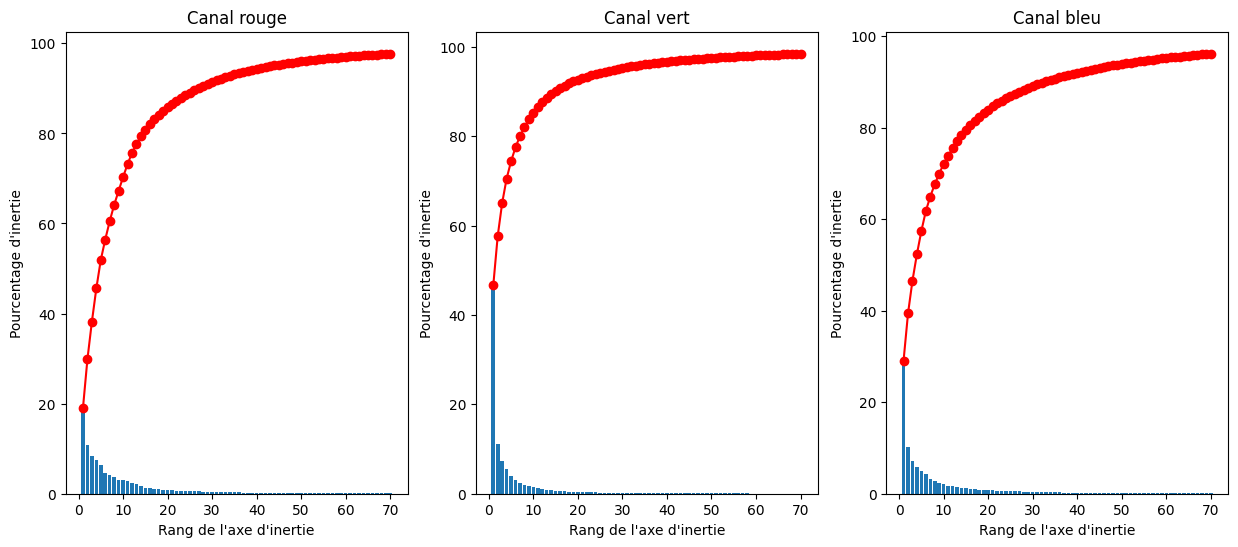

In [15]:
x = list(range(1, n_components + 1))
fig = plt.figure(figsize = (15, 6)) 

add_subplot(
    x=x,
    fitted_pca=pca_r,
    subplot_position=131,
    channel_name="rouge",
)

add_subplot(
    x=x,
    fitted_pca=pca_g,
    subplot_position=132,
    channel_name="vert",
)

add_subplot(
    x=x,
    fitted_pca=pca_b,
    subplot_position=133,
    channel_name="bleu",
)

plt.show()

- Afficher le taux de variance totale expliquée par les n_components premières composantes de l'ACP pour chaque canal de couleur.

In [16]:
print(sum(pca_r.explained_variance_ratio_))
print(sum(pca_g.explained_variance_ratio_))
print(sum(pca_b.explained_variance_ratio_))

0.9769671961605697
0.9845025388381184
0.9620204349899353


### Reconstruction de l'image réduite

- Reconstruire les tableaux numpy des différents canaux à partir des transformées inverses des ACP. Afficher les tailles des objets obtenus. 

In [17]:
r_array = pca_r.inverse_transform(tr_r)
g_array = pca_g.inverse_transform(tr_g)
b_array = pca_b.inverse_transform(tr_b)

- Reconstruire le tableau numpy de l'image globale à l'aide de la fonction merge de cv2.

(873, 800, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


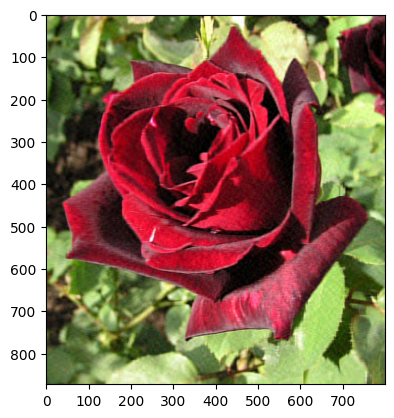

In [18]:
reduced_img = cv2.merge((r_array, g_array, b_array))
print(reduced_img.shape)
plt.imshow(reduced_img)
plt.show()

- Afficher côte à côte l'image initiale et l'image réduite.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


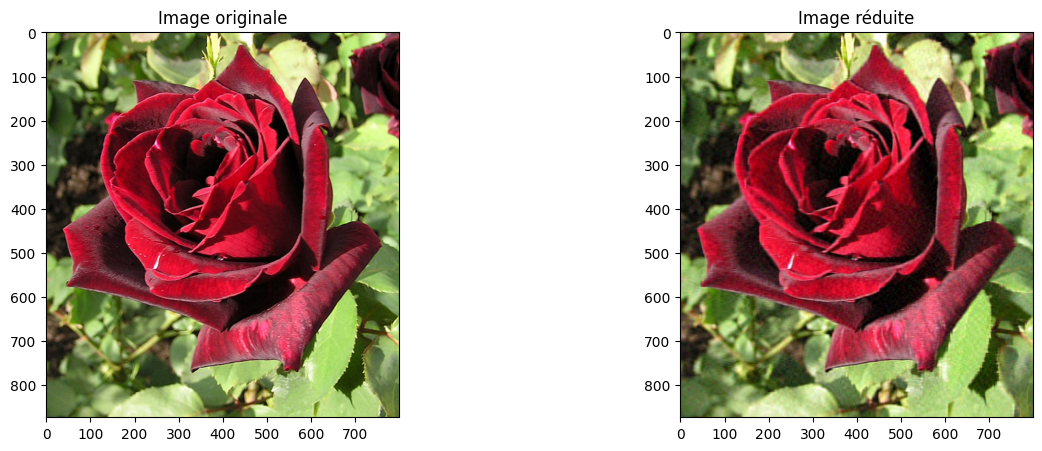

In [19]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(121)
plt.title("Image originale")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Image réduite")
plt.imshow(reduced_img)
plt.show()

### Réglage du nombre de composantes

- A l'aide de l'éboulis des valeurs propres, proposer une valeur plus restrictive du nombre de composantes permettant malgré tout de "bien" expliquer la "plupart" de la variance. Relancer le code avec cette nouvelle valeur. Essayer éventuellement une valeur trop faible. Conclure quant à l'utilité et aux limites de l'ACP dans le contexte d'étude.